#### Importing notebooks

In [3]:
%%capture
%run '01_Getting_Data.ipynb'

#### Settings

In [4]:
pandas.options.mode.chained_assignment = None

#### Functions

In [26]:
def calculate_returns(delta_time_in_days):
    
    data['order'] = 0
    
    data['rolling_mean_search_volume']  = data['search_volume'].rolling(delta_time_in_days).mean().shift(1)
    
    data['order'][data.search_volume > data.rolling_mean_search_volume.shift(1)] = -1 # sell signal
    data['order'][data.search_volume < data.rolling_mean_search_volume.shift(1)] = 1 # buy signal
    
    data['google_returns'] = data.order * numpy.log(data.bitcoin_price.shift(-1)) - data.order * numpy.log(data.bitcoin_price)
    data['buy_hold_returns'] = numpy.log(data.bitcoin_price.shift(-1)) - numpy.log(data.bitcoin_price)
    
    data['total_google_returns'] = numpy.exp(data.google_returns.cumsum()) - 1
    data['total_buy_hold_returns'] = numpy.exp(data.buy_hold_returns.cumsum()) -1

    return data

## 1. Tobias Preis' Google Trends based trading strategy

### 1. Calculate ratio

In [27]:
#code based on: https://github.com/twiecki/replicate_google_trends/blob/master/goog_repl.ipynb
#log because time additive: https://www.youtube.com/watch?v=PtoUlt3V0CI 

delta_time_limit = 9
delta_time_limit = delta_time_limit + 1

index = list(range(0, delta_time_limit))

ratio = pandas.DataFrame(index=index, columns=['google_buy_ratio'])
ratio = ratio.fillna(0.0)

for value in index:        
    data = calculate_returns(value)
    ratio['google_buy_ratio'][value] = data['total_google_returns'].iloc[-2]/(float)(data['total_buy_hold_returns'].iloc[-2])
    
ratio.head()

,google_buy_ratio
0,0.000000
1,0.003193
2,0.002763
3,0.004133
4,0.003412


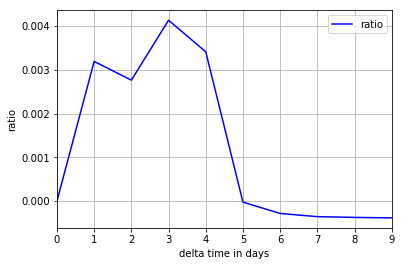

In [28]:
ax = ratio.plot(color='b')
ax.grid()
ax.set_xlabel('delta time in days')
ax.set_ylabel('ratio')
ax.legend(('ratio',), loc=0) #loc 0: best

In [24]:
ratio.head()

,google_buy_ratio
0,0.000000
1,0.003193
2,0.002763
3,0.004133
4,0.003412


In [17]:
max(ratio.idxmax())

0

### 3. Highest Ratio

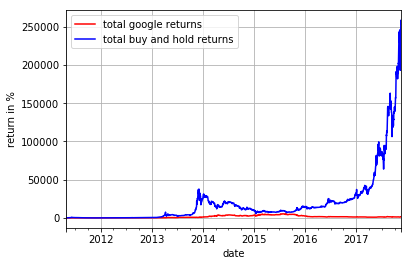

In [17]:
data = calculate_returns(3)

ax = (data['total_google_returns']*100).plot(color='r')
ax = (data['total_buy_hold_returns']*100).plot(color='b')
ax.grid()
ax.set_xlabel('date')
ax.set_ylabel('return in %')
ax.legend(('total google returns', 'total buy and hold returns'), loc=2)